In [1]:
import matplotlib
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

axes = {'labelsize': 16
       }
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size' : 32,
        }
matplotlib.rc('font', **font)
matplotlib.rc('axes', **axes) 

## Problema de prueba de hipótesis


**Supongamos que se tiene una línea de producción de cierto producto, en donde el
envasado debe llenar cajas con 720 gramos. Sin embargo, se sospecha que las
máquinas no están calibradas, por lo que las cajas se podrían estar llenando con una
cantidad de producto inadecuada (en exceso o en defecto). Se sabe además que las
máquinas funcionan con un error estándar de 7 gramos.
El objetivo es determinar si las máquinas funcionan correctamente.**


Sea X la VA que resulta de pesar un conjunto de cajas en una MA de tamaño N.

$$X:\Omega\to R$$

Se quiere probar la hipótesis:

$$H_0: \mu=720$$

El estadístico de la prueba es $$\hat{\mu} = \bar{X}$$

Primero veamos cómo es la distribución teórica de X bajo hipótesis nula.  Se espera que la distribución sea normal, por el TLC.

$$\bar{X} \sim N\left(\mu, \frac{\sigma^2}{N}\right)$$

### Distribución del peso de las cajas bajo H0

Text(0, 0.5, 'función de densidad de probabilidad')

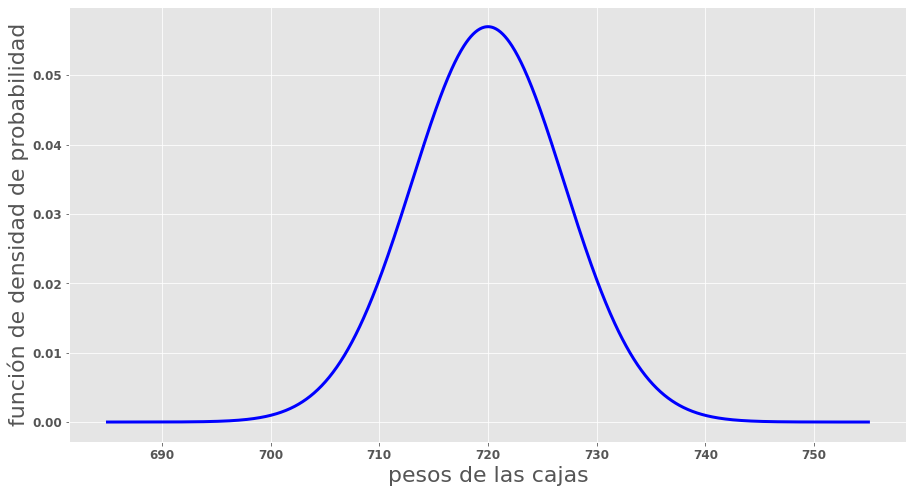

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

plt.style.use('ggplot')

mean = 720
std = 7

x = np.linspace(mean - 5 * std, mean + 5 * std, 1000)

dist_X = stats.norm(mean, std)

fig = plt.figure(figsize=(15,8))
plt.plot(x, dist_X.pdf(x), 'b-', lw=3)
plt.xlabel('pesos de las cajas', fontsize=22)
plt.ylabel('función de densidad de probabilidad', fontsize=22)

### Distribución del promedio de una muestra

Supongamos que tomamos una muestra aleatoria de n=30 cajas, y definimos una nueva VA:

$$n=30$$

$$MA: \{X_i\}_{i=1}^n$$

$$\bar{X} = \frac{1}{N} \sum_{i=1}^n X_i$$

Por la propiedad reproductiva de la normal, la media se distribuye como:

$$\bar{X} \sim N(\mu, \frac{\sigma^2}{N})$$

Text(94.25, 0.5, 'función de densidad de probabilidad')

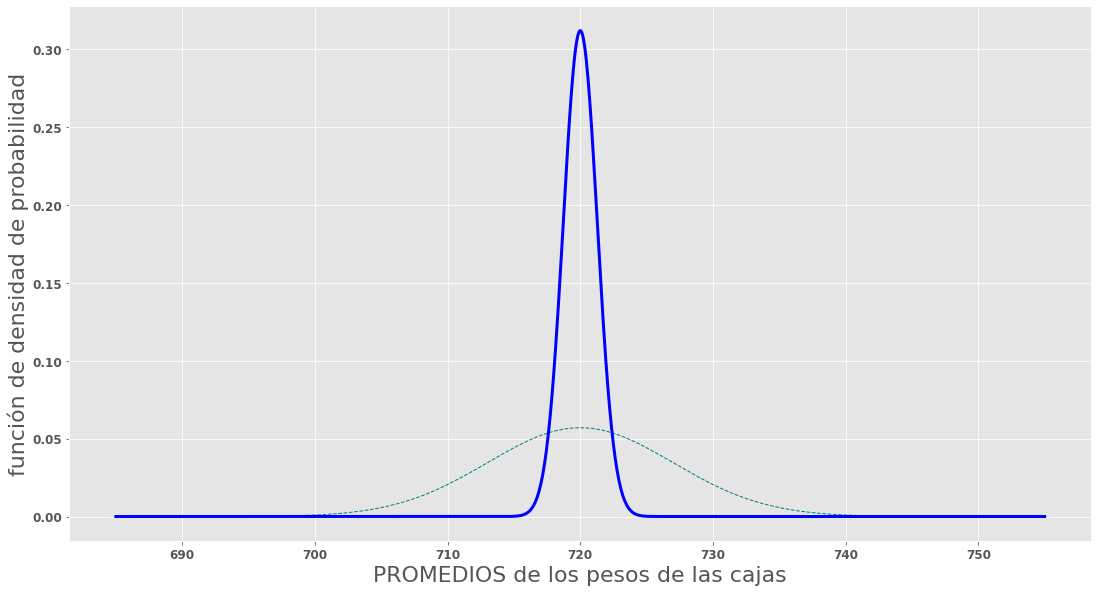

In [5]:
N = 30

std_med = std/np.sqrt(N)
dist_Xmed = stats.norm(mean, std_med)

fig = plt.figure(figsize=(15,8))
plt.plot(x, dist_X.pdf(x), color='teal', lw=1, linestyle='--')
plt.plot(x, dist_Xmed.pdf(x), 'b-', lw=3)
plt.tight_layout()
plt.xlabel('PROMEDIOS de los pesos de las cajas', fontsize=22)
plt.ylabel('función de densidad de probabilidad', fontsize=22)

Ahora para hacer la prueba de hipótesis, planteamos un valor para el nivel de confianza.  Supongamos que pedimos un nivel de confianza del 95%:
$$\alpha=0.05$$

In [6]:
alpha = 0.05
mn = mean - 5 * std_med
mx = mean + 5 * std_med
xm = x = np.linspace(mn, mx, 1000)

q1 = alpha/2
q2 = 1-q1

In [7]:
print(dist_Xmed.ppf(q1))
print(dist_Xmed.ppf(q2))

717.495128198796
722.504871801204


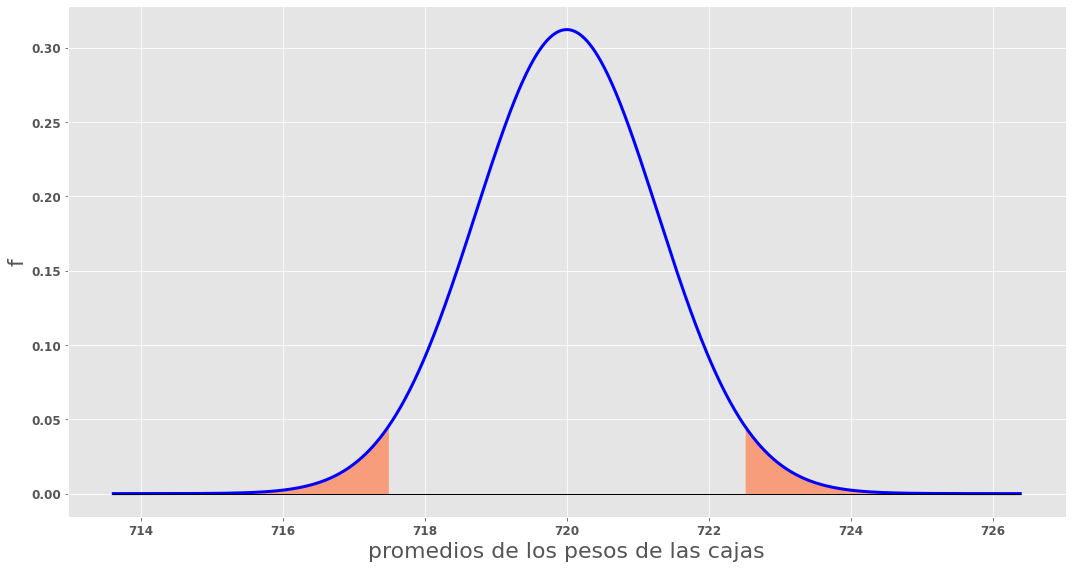

In [8]:
fig = plt.figure(figsize=(15,8))
plt.fill_between(
        xm, dist_Xmed.pdf(xm),
        where=xm < dist_Xmed.ppf(q1),
        color='coral',
        alpha=0.7,
        linewidth=0)
plt.fill_between(
        xm, dist_Xmed.pdf(xm),
        where=xm > dist_Xmed.ppf(q2),
        color='coral',
        alpha=0.7,
        linewidth=0)
plt.plot(xm, dist_Xmed.pdf(xm), 'b-', lw=3)

plt.xlabel('promedios de los pesos de las cajas', fontsize=22)
plt.ylabel('f', fontsize=22)
plt.plot([mean - 5 * std_med, mean + 5 * std_med],[0,0], c='k', lw=1)
#plt.plot([dist_Xmed.ppf(q1), dist_Xmed.ppf(q2)],[0,0], c='blue', lw=3)
plt.tight_layout()

El segmento que corresponde a la parte pintada es la región de rechazo.

### Prueba de hipótesis cuando la hipótesis nula es verdadera

Ahora sorteamos una MA para simular el experimento:

In [17]:
X = dist_X.rvs(N)
print(X)
Xhat = np.mean(X)
print(Xhat)

[715.6909722  709.43498447 727.87745011 712.49613444 714.27331147
 713.37017185 717.63797167 731.51910562 710.08259753 726.47316457
 714.3669582  711.11087719 716.35868032 718.79020364 714.89854074
 704.31185206 731.45570633 729.35587721 727.13040831 717.17033235
 708.77760606 717.77633254 726.28456665 722.24845709 705.51430655
 717.4578174  720.9437604  723.103545   727.26258219 722.40334131]
718.5192538488088


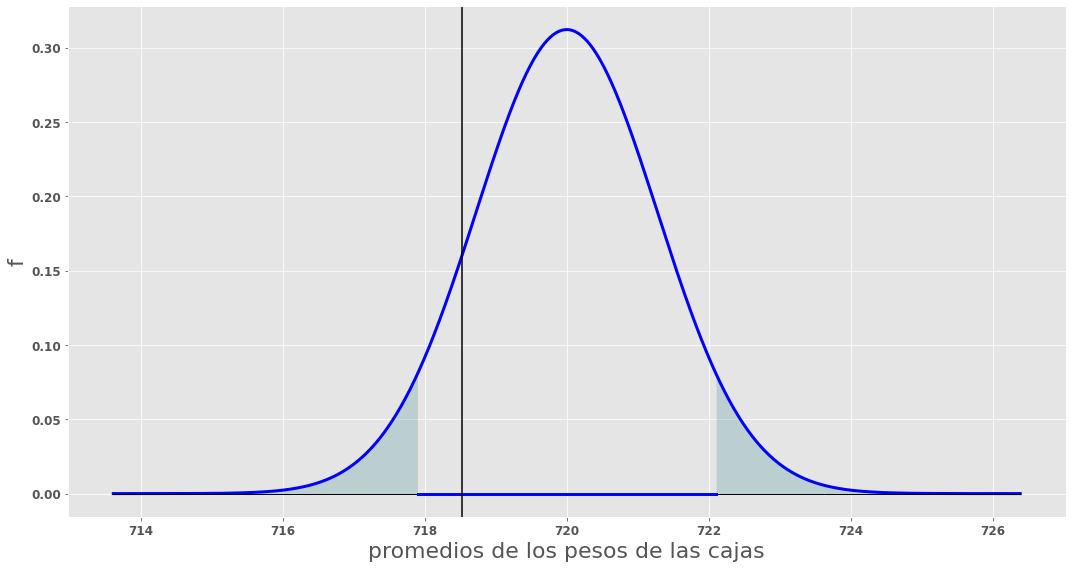

In [18]:
alpha = 0.05
xm = x = np.linspace(mean - 5 * std_med, mean + 5 * std_med, 1000)

q1 = alpha/1
q2 = 1-q1

IC_inf = dist_Xmed.ppf(q1)
IC_sup = dist_Xmed.ppf(q2)

fig = plt.figure(figsize=(15,8))

plt.fill_between(
        xm, dist_Xmed.pdf(xm),
        where=xm < IC_inf,
        color='cadetblue',
        alpha=0.3,
        linewidth=0)
plt.fill_between(
        xm, dist_Xmed.pdf(xm),
        where=xm > IC_sup,
        color='cadetblue',
        alpha=0.3,
        linewidth=0)
plt.plot(xm, dist_Xmed.pdf(xm), 'b-', lw=3)

plt.xlabel('promedios de los pesos de las cajas', fontsize=22)
plt.ylabel('f', fontsize=22)
plt.plot([mean - 5 * std_med, mean + 5 * std_med],[0,0], c='k', lw=1)
plt.plot([dist_Xmed.ppf(q1), dist_Xmed.ppf(q2)],[0,0], c='blue', lw=3)
plt.axvline(x=Xhat, c='black')
plt.tight_layout()

Notar que a veces se acepta la hipótesis nula y a veces se rechaza.  Si H0 fuera verdadera, deberíamos rechazarla con probabilidad $\alpha$.  Veamos si se cumple.  Para eso vamos a generar muchas muestras aleatorias y ver qué fracción de veces cometemos el error de tipo I.

In [31]:
Nexperiments = 1000
N = 100

std_med = std/np.sqrt(N)
dist_Xmed = stats.norm(mean, std_med)
q1 = alpha/2
q2 = 1-q1
IC_inf = dist_Xmed.ppf(q1)
IC_sup = dist_Xmed.ppf(q2)

h0 = []
xhats = []
for _ in range(Nexperiments):
    X = dist_X.rvs(N)
    Xhat = np.mean(X)
    h0.append(np.logical_and(Xhat>IC_inf, Xhat<IC_sup))
    xhats.append(Xhat)


In [32]:
Nexperiments- sum(h0)

55

In [30]:
print(sum(h0)/float(Nexperiments))
print(1-alpha)

0.944
0.95


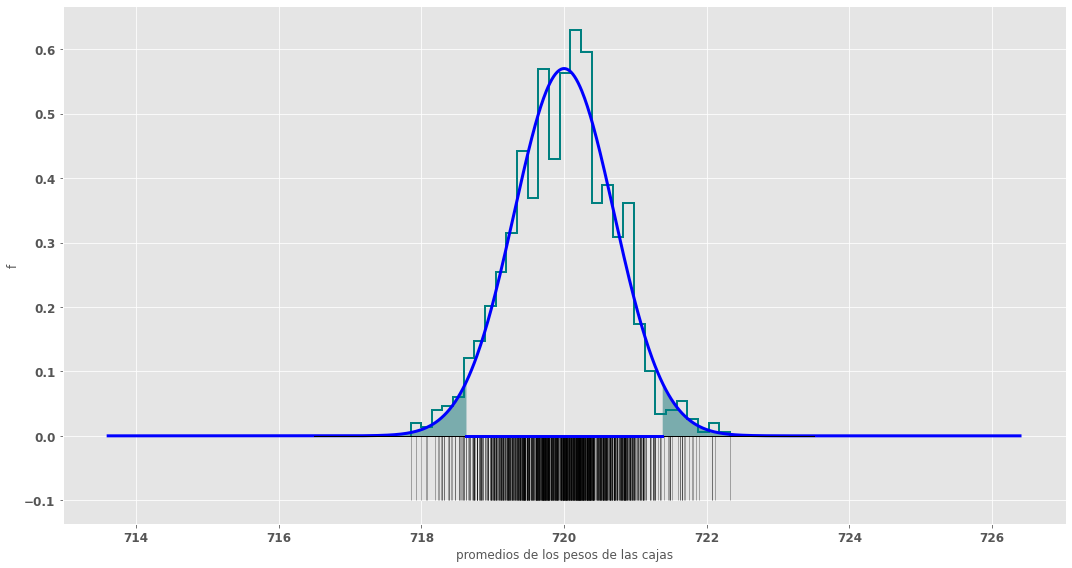

In [33]:
fig = plt.figure(figsize=(15,8))

plt.fill_between(
        xm, dist_Xmed.pdf(xm),
        where=xm < IC_inf,
        color='cadetblue',
        alpha=0.8,
        linewidth=0)
plt.fill_between(
        xm, dist_Xmed.pdf(xm),
        where=xm > IC_sup,
        color='cadetblue',
        alpha=0.8,
        linewidth=0)

plt.plot(xm, dist_Xmed.pdf(xm), 'b-', lw=3)

plt.xlabel('promedios de los pesos de las cajas')
plt.ylabel('f')
plt.plot([mean - 5 * std_med, mean + 5 * std_med],[0,0], c='k', lw=1)
plt.plot([dist_Xmed.ppf(q1), dist_Xmed.ppf(q2)],[0,0], c='blue', lw=3)
for Xhat in xhats:
    plt.vlines(Xhat, -0.1, 0., color='k', lw=1, alpha=0.3)
plt.hist(xhats, density=True, bins=30, histtype='step', color='teal', lw=2)
plt.tight_layout()

________

## H0 falsa: Rechazo de la hipótesis nula y errores teóricos

Supongamos ahora que la hipótesis nula es falsa, las máquinas funcionan mal, y cargan en promedio 715 gramos.  Vamos a probar la hipótesis de que en realidad funcionan bien, es decir:

$$\mu=715$$

$$H_0: \mu_0=720$$


Ahora la distribución verdadera de los pesos medios de las cajas en muestras de tamaño N y la distribución bajo hipótesis nula no coinciden!

In [53]:
N = 30

# Distribucion verdadera:
mu_true = 718
std_true = 7
std_true_med = std_true/np.sqrt(N)
dist_X_true_med = stats.norm(mu_true, std_true_med)

# Distribución si la hipótesis nula fuera cierta:
mu_H0 = 720
std_H0 = 7
std_H0_med = std_H0/np.sqrt(N)
dist_X_H0_med = stats.norm(mu_H0, std_H0_med)

In [ ]:
# MA:
X = dist_X_true_med.rvs(N)
Xhat = np.mean(X)

Calculemos también el error tipo II

Es decir, la probabilidad de aceptar H0 (cuando H0 es en realidad falsa)

In [ ]:
xm = x = np.linspace(mean - 12 * std_med, mean + 7 * std_med, 1000)
fig = plt.figure(figsize=(12,8))

plt.plot(xm, dist_X_true_med.pdf(xm), 'b-', lw=3)
plt.fill_between(
        xm, dist_X_true_med.pdf(xm),
        where=np.logical_and(xm <dist_X_H0_med.ppf(q2) , xm>dist_X_H0_med.ppf(q1)),
        color='blue',
        alpha=0.3,
        linewidth=0,
        label='Error tipo II')

plt.plot(xm, dist_X_H0_med.pdf(xm), 'r-', lw=3, label='dist. bajo H0')
plt.fill_between(
        xm, dist_X_H0_med.pdf(xm),
        where=xm < dist_X_H0_med.ppf(q1),
        color='orange',
        alpha=0.3,
        linewidth=0)
plt.fill_between(
        xm, dist_X_H0_med.pdf(xm),
        where=xm > dist_X_H0_med.ppf(q2),
        color='orange',
        alpha=0.3,
        linewidth=0,
        label='Error tipo I')

plt.xlabel('promedios de los pesos de las cajas', fontsize=20)
plt.ylabel('f', fontsize=20)
plt.plot([mean - 5 * std_med, mean + 5 * std_med],[0,0], c='k', lw=1)
plt.axvline(x=Xhat, c='black')
plt.tight_layout()
plt.legend()

$\beta$ es igual al área bajo la curva "verdadera" en el IC de la curva de la H0

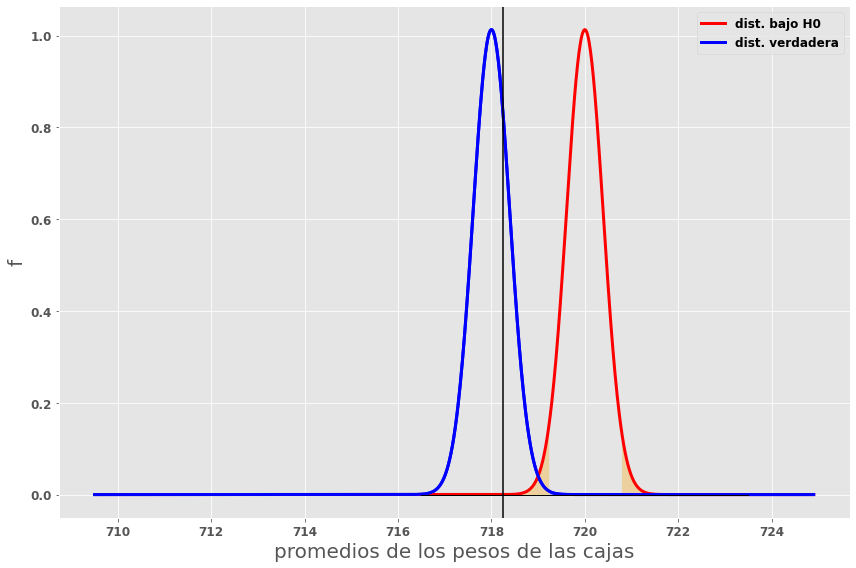

In [68]:
xm = x = np.linspace(mean - 15 * std_med, mean + 7 * std_med, 1000)

fig = plt.figure(figsize=(12,8))
plt.plot(xm, dist_X_true_med.pdf(xm), 'b-', lw=3)
plt.fill_between(
        xm, dist_X_true_med.pdf(xm),
        where=np.logical_and(xm <dist_X_H0_med.ppf(q2) , xm>dist_X_H0_med.ppf(q1)),
        color='blue',
        alpha=0.3,
        linewidth=0)

plt.plot(xm, dist_X_H0_med.pdf(xm), 'r-', lw=3, label='dist. bajo H0')
plt.fill_between(
        xm, dist_X_H0_med.pdf(xm),
        where=xm < dist_X_H0_med.ppf(q1),
        color='orange',
        alpha=0.3,
        linewidth=0)
plt.fill_between(
        xm, dist_X_H0_med.pdf(xm),
        where=xm > dist_X_H0_med.ppf(q2),
        color='orange',
        alpha=0.3,
        linewidth=0)

plt.plot(xm, dist_X_true_med.pdf(xm), 'b-', lw=3, label='dist. verdadera')


plt.xlabel('promedios de los pesos de las cajas', fontsize=20)
plt.ylabel('f', fontsize=20)
plt.plot([mean - 5 * std_med, mean + 5 * std_med],[0,0], c='k', lw=1)
plt.axvline(x=Xhat, c='black')
plt.tight_layout()
plt.legend()

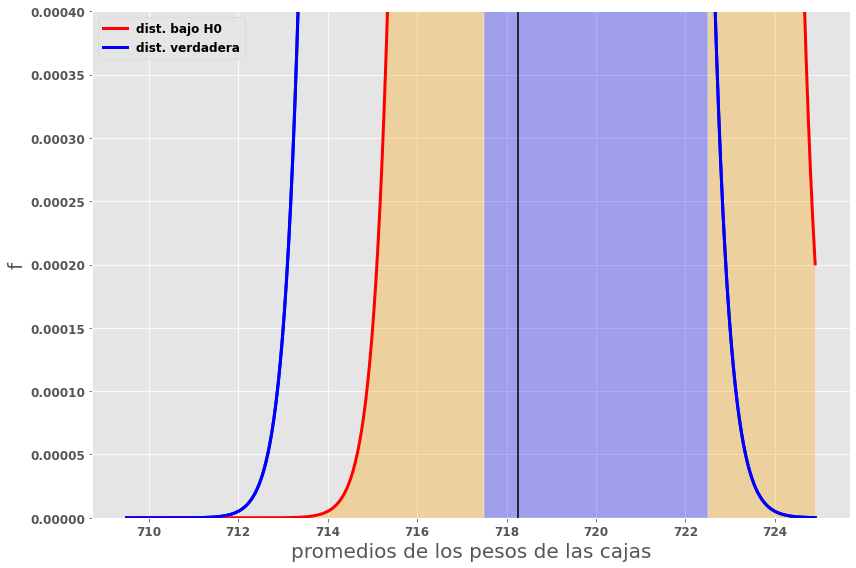

In [61]:
xm = x = np.linspace(mean - 15 * std_med, mean + 7 * std_med, 1000)

fig = plt.figure(figsize=(12,8))
plt.plot(xm, dist_X_true_med.pdf(xm), 'b-', lw=3)
plt.fill_between(
        xm, dist_X_true_med.pdf(xm),
        where=np.logical_and(xm <dist_X_H0_med.ppf(q2) , xm>dist_X_H0_med.ppf(q1)),
        color='blue',
        alpha=0.3,
        linewidth=0)

plt.plot(xm, dist_X_H0_med.pdf(xm), 'r-', lw=3, label='dist. bajo H0')
plt.fill_between(
        xm, dist_X_H0_med.pdf(xm),
        where=xm < dist_X_H0_med.ppf(q1),
        color='orange',
        alpha=0.3,
        linewidth=0)
plt.fill_between(
        xm, dist_X_H0_med.pdf(xm),
        where=xm > dist_X_H0_med.ppf(q2),
        color='orange',
        alpha=0.3,
        linewidth=0)

plt.plot(xm, dist_X_true_med.pdf(xm), 'b-', lw=3, label='dist. verdadera')


plt.xlabel('promedios de los pesos de las cajas', fontsize=20)
plt.ylabel('f', fontsize=20)
plt.plot([mean - 5 * std_med, mean + 5 * std_med],[0,0], c='k', lw=1)
plt.axvline(x=Xhat, c='black')
plt.ylim(0, 0.0004)
plt.tight_layout()
plt.legend()

In [62]:
# IC:
IC_izq = dist_X_H0_med.ppf(q2)
IC_der = dist_X_H0_med.ppf(q1)

In [63]:
dist_X_true_med.cdf(IC_der) - dist_X_true_med.cdf(IC_izq)

-0.6533823656529233

Veamos que pasa con los errores cuando cambian las condiciones del experimento.  Recordar que hay que proponer un valor de $\alpha$ pero no se tiene control sobre el error de tipo II ($\beta$).

Primero variamos el tamaño de la muestra:

In [64]:
# Distribucion verdadera:
mu_true = 718
std_true = 7

# Distribución si la hipótesis nula fuera cierta:
mu_H0 = 720
std_H0 = 7

nn = [np.power(10,k) for k in np.linspace(1, 2.5, 50)]
nn = np.floor(nn)

In [65]:
nn

array([ 10.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  20.,
        21.,  23.,  25.,  26.,  28.,  30.,  33.,  35.,  38.,  40.,  43.,
        47.,  50.,  54.,  58.,  62.,  67.,  71.,  77.,  82.,  88.,  95.,
       102., 109., 117., 126., 135., 145., 156., 167., 179., 193., 207.,
       222., 238., 255., 274., 294., 316.])

In [66]:
beta = []

for N in nn:
    std_true_med = std_true/np.sqrt(N)
    dist_X_true_med = stats.norm(mu_true, std_true_med)
    std_H0_med = std_H0/np.sqrt(N)
    dist_X_H0_med = stats.norm(mu_H0, std_H0_med)
    beta.append(dist_X_true_med.cdf(dist_X_H0_med.ppf(q2)) - dist_X_true_med.cdf(dist_X_H0_med.ppf(q1)))

Text(0, 0.5, 'type II error')

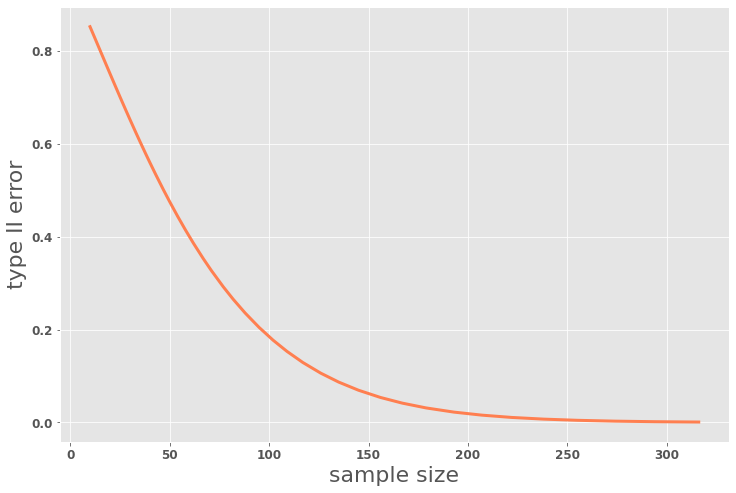

In [67]:
fig = plt.figure(figsize=(12,8))

plt.plot(nn, beta, color='coral', linewidth=3)
plt.xlabel('sample size', fontsize=22)
plt.ylabel('type II error', fontsize=22)

Ahora variamos la media verdadera de la distribución.

In [176]:
std_true = std_H0 = 7
mu = np.linspace(710, 730, 90)
mu_H0 = 720
N = 20

beta = []

for mu_true in mu:
    
    std_true_med = std_true/np.sqrt(N)
    dist_X_true_med = stats.norm(mu_true, std_true_med)
    std_H0_med = std_H0/np.sqrt(N)
    dist_X_H0_med = stats.norm(mu_H0, std_H0_med)
    beta.append(dist_X_true_med.cdf(dist_X_H0_med.ppf(q2)) - dist_X_true_med.cdf(dist_X_H0_med.ppf(q1)))

Text(0, 0.5, 'type II error')

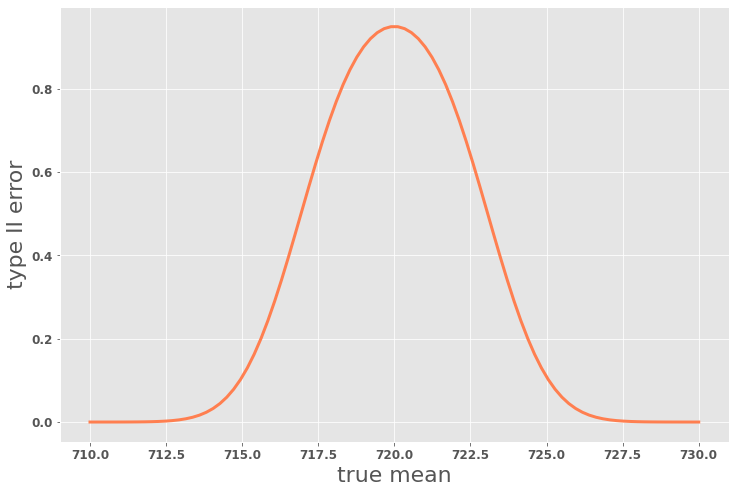

In [178]:
fig = plt.figure(figsize=(12,8))

plt.plot(mu, beta, color='coral', linewidth=3)
plt.xlabel('true mean', fontsize=22)
plt.ylabel('type II error', fontsize=22)

Ahora veamos si para N fijo y para $\mu$ fijo cambiamos $\alpha$:

(tarea)